In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Creating DataFrames to Use

In [4]:
training_data = pd.read_parquet("../Databases/cf_train.parquet/part-00003-f5f99d61-97a3-408a-9dcd-5d6fc378fff2-c000.snappy.parquet")

In [5]:
map_track_index_id = {}
for track_id_index,track_id in zip(training_data['track_id_index'],training_data['track_id']):
    map_track_index_id[track_id_index] = track_id

In [6]:
from pathlib import Path
import pandas as pd

data_dir = Path('../Databases/itemFactors_5_12_130am.parquet-20210512T212320Z-001/itemFactors_5_12_130am.parquet')
item_factors_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [7]:
item_factors_df.head()

,id,features
0,0,"[-0.069474705, 0.4626529, -0.11687545, -0.7458..."
1,10,"[-0.19217631, 0.33361778, -0.6735579, -0.31199..."
2,20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672..."
3,30,"[-0.15235876, 0.35179976, 0.64976025, -0.63035..."
4,40,"[-0.15211484, 0.38842732, -0.17080618, -0.2903..."


In [8]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("../Databases/track_metadata.db")

metadata_df = pd.read_sql_query("SELECT * FROM songs", con)

In [9]:
item_factors_df['id'] = item_factors_df['id'].apply(lambda x: map_track_index_id[x])

In [2]:
df_embedded = pd.read_csv("TSNE_Embed_FULL_FINAL.csv")

### Creating Tags DataFrame

In [3]:
import sqlite3

# Create a SQL connection to our SQLite database
con_lastfm = sqlite3.connect("../Databases/lastfm_tags.db")

cur = con_lastfm.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM sqlite_master WHERE type="table";'):
    print(row)

cur.execute('SELECT * FROM sqlite_master WHERE type="table";').fetchall()

('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)')
('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)')
('table', 'tid_tag', 'tid_tag', 4, 'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')


[('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)'),
 ('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)'),
 ('table',
  'tid_tag',
  'tid_tag',
  4,
  'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')]

In [4]:
tid_df = pd.read_sql_query("SELECT * FROM tids;", con_lastfm)

In [5]:
tag_df = pd.read_sql_query("SELECT * FROM tags;", con_lastfm)

In [6]:
tid_tag_df = pd.read_sql_query("SELECT * FROM tid_tag;", con_lastfm)

In [7]:
map_idx_tid = {}
for i in range(len(tid_df)):
    map_idx_tid[i + 1] = tid_df['tid'][i]

In [8]:
map_idx_tag = {}
for i in range(len(tag_df)):
    map_idx_tag[i + 1] = tag_df['tag'][i]

In [9]:
tid_tag_df['tid'] = tid_tag_df['tid'].apply(lambda x: map_idx_tid[x])

In [10]:
tid_tag_df['tag'] = tid_tag_df['tag'].apply(lambda x: map_idx_tag[x])

In [11]:
tid_tag_count_df = pd.DataFrame(tid_tag_df['tag'].value_counts())

# Top 20 Most Frequent First

In [12]:
top_20_genres = list(tid_tag_count_df.index[:20])

In [13]:
tid_tag_top_20_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_20_genres)]

In [14]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [15]:
tid_tag_top_20_group_FIRST_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].first().reset_index()

In [16]:
tags_FIRST_20_item_factors_df = df_embedded.merge(tid_tag_top_20_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

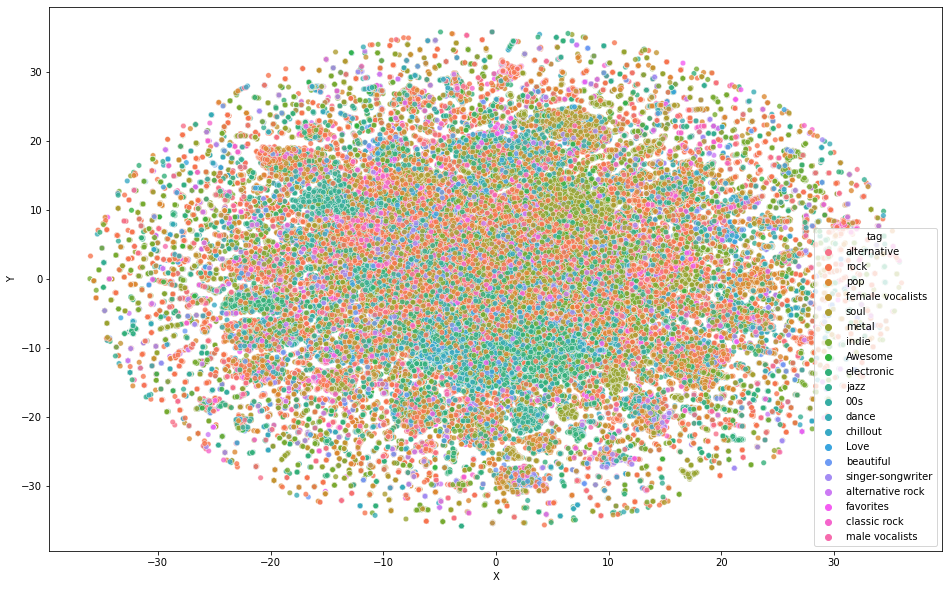

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_20_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

# Top 20 Most Frequent First

In [18]:
top_10_genres = list(tid_tag_count_df.index[:10])

In [19]:
tid_tag_top_10_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_10_genres)]

In [20]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [21]:
tid_tag_top_10_group_FIRST_tid_df = tid_tag_top_10_df.groupby(['tid'])['tag'].first().reset_index()

In [22]:
tags_FIRST_10_item_factors_df = df_embedded.merge(tid_tag_top_10_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

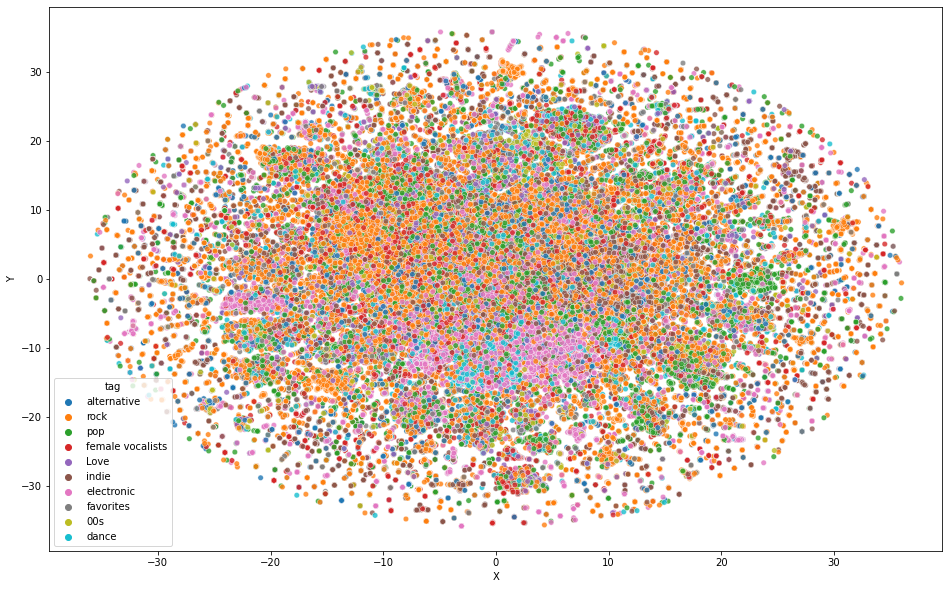

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_10_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

# Top 2 Most Frequent First

In [24]:
top_2_genres = list(tid_tag_count_df.index[:2])

In [25]:
tid_tag_top_2_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_2_genres)]

In [26]:
# tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [27]:
tid_tag_top_2_group_FIRST_tid_df = tid_tag_top_2_df.groupby(['tid'])['tag'].first().reset_index()

In [28]:
tags_FIRST_2_item_factors_df = df_embedded.merge(tid_tag_top_2_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

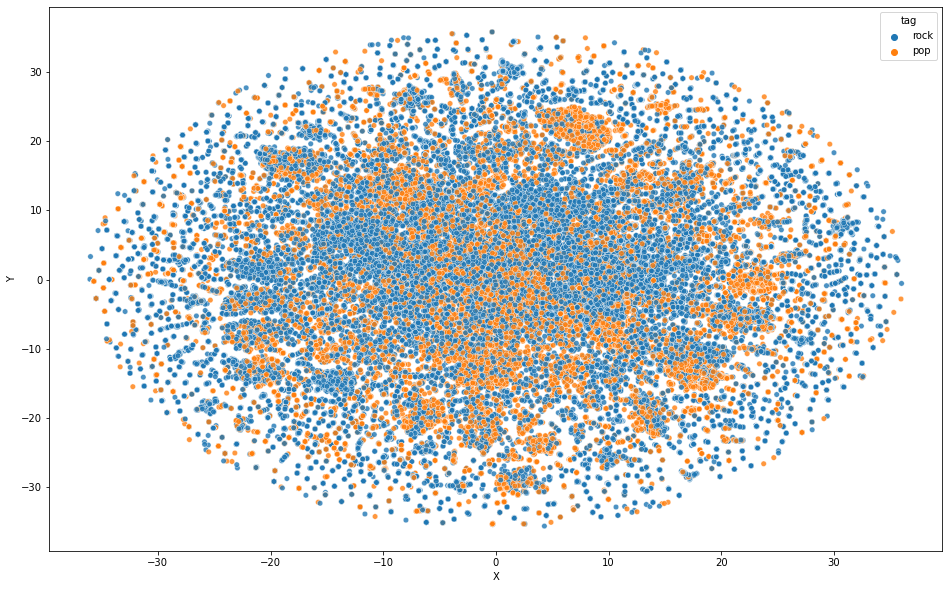

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_2_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

## Sample Tags


In [30]:
tags_Random_Sample = list(tid_tag_count_df[(tid_tag_count_df['tag']< 2500) & (tid_tag_count_df['tag']> 2490)].index)

In [31]:
tags_Random_Sample

['deep house', 'eurodance']

In [32]:
tid_tag_random_sample_df = tid_tag_df.loc[tid_tag_df['tag'].isin(tags_Random_Sample)]

In [33]:
tid_tag_Random_sample_group_FIRST_tid_df = tid_tag_random_sample_df.groupby(['tid'])['tag'].first().reset_index()

In [34]:
tags_FIRST_Random_sample_item_factors_df = df_embedded.merge(tid_tag_Random_sample_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

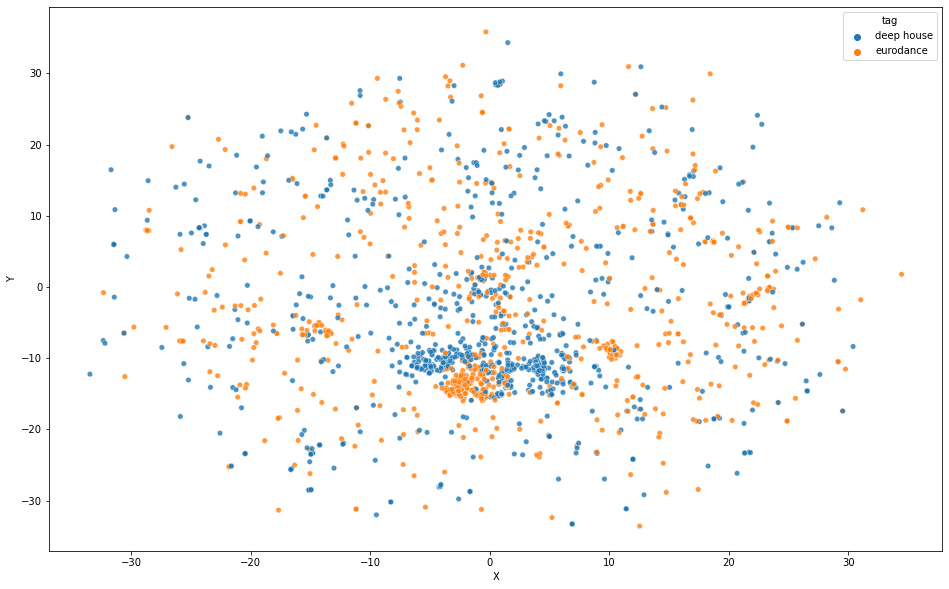

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_Random_sample_item_factors_df,
    legend="full",
    alpha=0.8,
    s = 30
)

In [46]:
any(tid_tag_df['tag'] == 'death metal')

True

In [47]:
any(tid_tag_df['tag'] == 'christian')

True

## Sample Tags Pick 2


In [48]:
tags_Random_Sample = list(tid_tag_count_df[(tid_tag_count_df['tag']< 2500) & (tid_tag_count_df['tag']> 2490)].index)

In [49]:
tags_Random_Sample

['deep house', 'eurodance']

In [76]:
tid_tag_random_sample_df = tid_tag_df.loc[(tid_tag_df['tag']== 'punk rock') |(tid_tag_df['tag']== 'christmas')]

In [77]:
tid_tag_Random_sample_group_FIRST_tid_df = tid_tag_random_sample_df.groupby(['tid'])['tag'].first().reset_index()

In [78]:
tags_FIRST_Random_sample_item_factors_df = df_embedded.merge(tid_tag_Random_sample_group_FIRST_tid_df,how='inner',left_on=['tid'],right_on=['tid'])

<AxesSubplot:xlabel='X', ylabel='Y'>

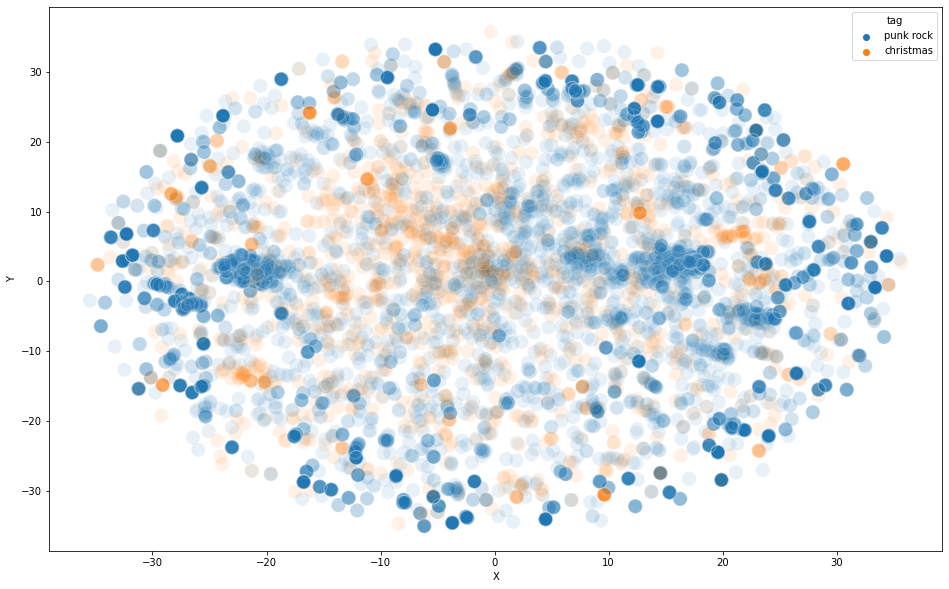

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="tag",
    data=tags_FIRST_Random_sample_item_factors_df,
    legend="full",
    alpha=0.1,
    s = 200
)

In [ ]:
sns.regplot()

### HOKE RAHEGA

In [76]:
tags_find = list(tid_tag_count_df[(tid_tag_count_df['tag']< 1200) & (tid_tag_count_df['tag']> 100)].index)

In [77]:
tid_tag_df_find = tid_tag_df.loc[tid_tag_df['tag'].isin(tags_find)]

In [78]:
tid_tag_df_find.head()

,tid,tag,val
18,TRCCCBJ128F4286E6F,hard progressive rock,33.0
21,TRCCCBJ128F4286E6F,scree123,33.0
22,TRCCJTI128EF35394A,Czech,100.0
24,TRCCJTD12903CB62E6,sugarsweet plinkelplankel,20.0
27,TRCCJTD12903CB62E6,mjp,20.0


In [79]:
tid_tag_embed_df_find = df_embedded.merge(tid_tag_df_find,how='inner',left_on=['tid'],right_on=['tid'])

In [80]:
tid_tag_embed_df_find.head()

,Unnamed: 0,X,Y,tid,tag,val
0,0,-5.913046e-06,0.000003,TRDMBIJ128F4290431,krautrock,100.0
1,0,-5.913046e-06,0.000003,TRDMBIJ128F4290431,gut,9.0
2,1,4.470624e-07,-0.000009,TRSLDDC12903CC36E7,omg,64.0
3,1,4.470624e-07,-0.000009,TRSLDDC12903CC36E7,Eddy-kay,7.0
4,1,4.470624e-07,-0.000009,TRSLDDC12903CC36E7,billboard number ones,7.0


In [81]:
tid_tag_embed_df_find.shape

(1270089, 6)

In [82]:
len(set(tid_tag_embed_df_find['tag']))

8694

In [83]:
dic_tag_mean = {}
tag_list = list(set(tid_tag_embed_df_find['tag']))

for tag in tag_list:
    X_val = tid_tag_embed_df_find[tid_tag_embed_df_find['tag'] == tag]['X'].mean()
    Y_val = tid_tag_embed_df_find[tid_tag_embed_df_find['tag'] == tag]['Y'].mean()
    dic_tag_mean[tag] = np.array([X_val, Y_val])

In [84]:
array_means = []

for tag in tag_list:
    array_means.append(dic_tag_mean[tag])

array_means = np.array(array_means)

In [66]:
array_means.shape

(160, 2)

In [70]:
from scipy import spatial

candidates = array_means[spatial.ConvexHull(array_means).vertices]

# get distances between each pair of candidate points
dist_mat = spatial.distance_matrix(candidates, candidates)

# get indices of candidates that are furthest apart
i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)

print(candidates[i], candidates[j], i , j)

[-3.0399272e-06  4.5164154e-07] [1.70711923e-06 7.41062473e-07] 1 6


In [71]:
tag_list[1], tag_list[6]

('Deutschrock', 'Guitar Solo')

In [ ]:
def op(pts, N, K):
    farthest_pts = [0] * K

    P0 = pts[np.random.randint(0, N)]
    farthest_pts[0] = P0
    ds0 = dist_ponto_cj(P0, pts)

    ds_tmp = ds0
    for i in range(1, K):
        farthest_pts[i] = ponto_mais_longe(ds_tmp)
        ds_tmp2 = dist_ponto_cj(farthest_pts[i], pts)
        ds_tmp = [min(ds_tmp[j], ds_tmp2[j]) for j in range(len(ds_tmp))]
        # print ('P[%d]: %s' % (i, farthest_pts[i]))
    return farthest_pts

In [ ]:
from math import sqrt
 
# Function calculates distance
# between two points
def dist(p1, p2):
     
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0
 
# Function to find the maximum
# distance between any two points
def maxDist(p):
 
    n = len(p)
    maxm = 0
 
    # Iterate over all possible pairs
    for i in range(n):
        for j in range(i + 1, n):
             
            # Update maxm
            maxm = max(maxm, dist(p[i], p[j]))
 
    # Return actual distance
    return sqrt(maxm)

In [ ]:
min_tag = None
max_tag = None

min_mean_x = 9999
max_mean_x = -9999

min_mean_y = 9999
max_mean_y = -9999

for tag in tag_list:
    if dic_tag_mean[tag][0] > max_mean_x:
        max_mean_x = dic_tag_mean[tag][0]
        
    if dic_tag_mean[tag][1] > max_mean_y:
        max_mean_y = dic_tag_mean[tag][1]
    if dic_tag_mean[tag][0] < min_mean_x:
        min_mean_x = dic_tag_mean[tag][0]
    if dic_tag_mean[tag][1] < min_mean_y:
        min_mean_y = dic_tag_mean[tag][1]